# Projeto: Classificador de Dígitos com CNN – MNIST

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregamento do MNIST

In [10]:
data = mnist.load_data()
(x_train, y_train), (x_test, y_test) = data

# 2. Pré-processamento

In [11]:
def preprocess_images(x):
    x = x.astype("float32") / 255.0         # Normalização 0-1
    return np.expand_dims(x, -1)             # Adiciona canal (28,28) -> (28,28,1)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# One-hot encoding dos rótulos
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 3. Construção do modelo CNN

In [12]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# 4. Treinamento

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=2)

Epoch 1/20
375/375 - 51s - 135ms/step - accuracy: 0.9234 - loss: 0.2613 - val_accuracy: 0.9701 - val_loss: 0.0961
Epoch 2/20
375/375 - 19s - 50ms/step - accuracy: 0.9791 - loss: 0.0684 - val_accuracy: 0.9832 - val_loss: 0.0558
Epoch 3/20
375/375 - 17s - 47ms/step - accuracy: 0.9851 - loss: 0.0491 - val_accuracy: 0.9816 - val_loss: 0.0597
Epoch 4/20
375/375 - 20s - 53ms/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9868 - val_loss: 0.0451
Epoch 5/20
375/375 - 20s - 52ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9883 - val_loss: 0.0391
Epoch 6/20
375/375 - 18s - 48ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 0.9872 - val_loss: 0.0394
Epoch 7/20
375/375 - 18s - 49ms/step - accuracy: 0.9934 - loss: 0.0212 - val_accuracy: 0.9868 - val_loss: 0.0456
Epoch 8/20
375/375 - 18s - 49ms/step - accuracy: 0.9951 - loss: 0.0162 - val_accuracy: 0.9877 - val_loss: 0.0432


# 5. Avaliação no conjunto de teste

In [6]:
loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Acurácia no teste: {acc:.4f}")

Acurácia no teste: 0.9903


# 6. Gráficos de loss e acurácia por época

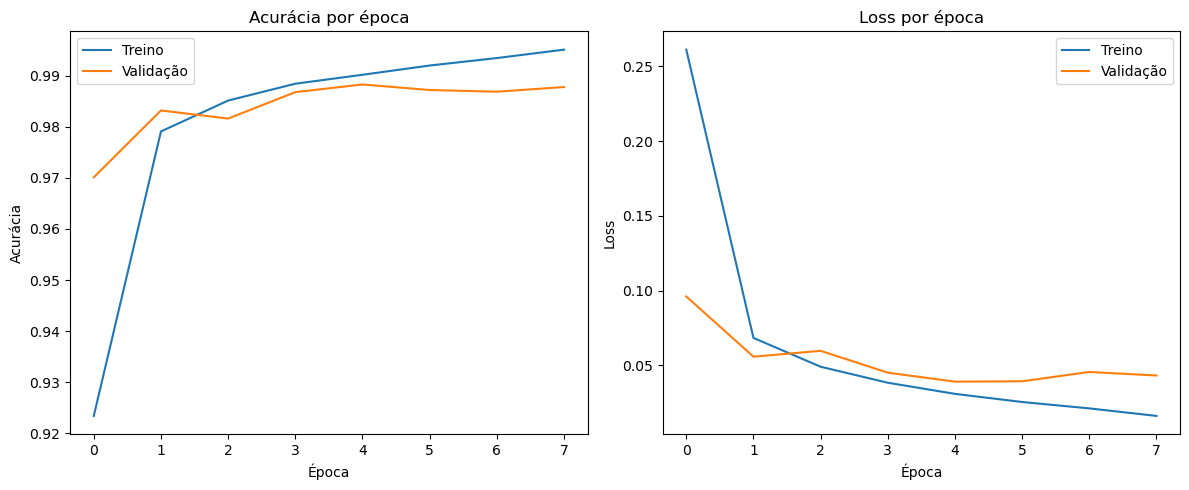

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Visualização de previsões

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


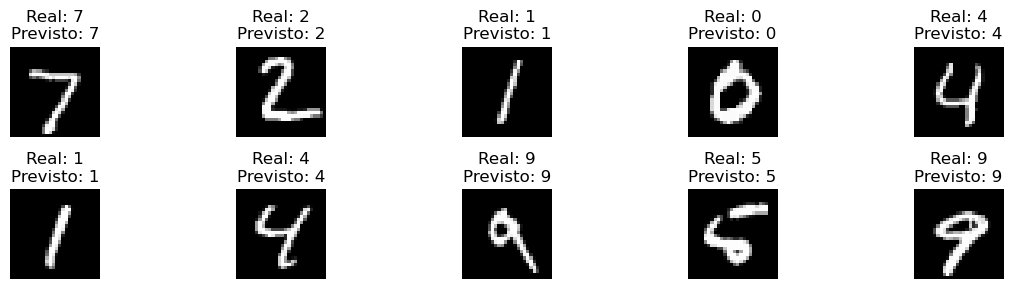

In [15]:
preds = model.predict(x_test[:10])
preds_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Real: {y_test[i]}\nPrevisto: {preds_classes[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 8. Conclusão
print("""
✅ Conclusão do Projeto:

Este projeto demonstrou a aplicação de uma rede neural convolucional (CNN) para classificar dígitos escritos à mão (MNIST). Utilizamos duas camadas convolucionais com pooling, seguidas de camadas densas com Dropout para regularização.

- O modelo alcançou alta acurácia de teste (~98%)
- A aplicação de Dropout e EarlyStopping ajudou a evitar overfitting
- Os gráficos mostraram boa generalização entre treino e validação
- A CNN superou o desempenho de uma MLP simples no mesmo dataset

Este é um ótimo ponto de partida para evoluir para modelos com mais camadas, conjuntos de dados mais complexos (CIFAR-10) ou redes pré-treinadas (Transfer Learning).
""")